C:\Users\Tristan-Lee Smanjak\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\Tristan-Lee Smanjak\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\Tristan-Lee Smanjak\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curren

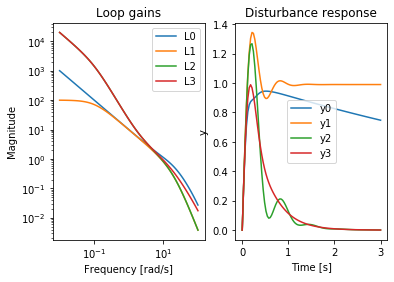

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from utils import tf

s = tf([1,0], 1)

# Set-up plant and Disturbance model
G = 200/((10*s + 1)*(0.05*s + 1)*(0.05*s + 1))
G_d = 100/(10*s + 1)

# The four different controllers in question

# K0 Origin?
# K1 Initial design
# K2 More gain at low frequency
# K3 High frequency correction

Ks = [((10*(10*s + 1))*(0.1*s + 1))/(s*200*(0.01*s + 1)),
      0.5,
      0.5*(s + 2)/s,
      (0.5*(s + 2)*(0.05*s + 1))/(s*(0.005*s + 1))]

w = np.logspace(-2, 2, 100)
s = 1j*w
tspan = np.linspace(0, 3, 100)

for K in Ks:
    # Closed loop tf"""
    L = G*K
    cont = (1/(1 + L))*G_d
    # Step response in the disturbance"""
    [t, y] = cont.step(0, tspan)

    # Plot results
    plt.subplot(1, 2, 1)
    plt.loglog(w, np.abs(L(s)))

    plt.subplot(1, 2, 2)
    plt.plot(t, y)

plt.subplot(1, 2, 1)
plt.xlabel("Frequency [rad/s]")
plt.ylabel("Magnitude")
plt.title("Loop gains")
plt.legend(["L0", "L1", "L2", "L3"])

plt.subplot(1, 2, 2)
plt.xlabel("Time [s]")
plt.ylabel("y")
plt.title("Disturbance response")
plt.legend(["y0", "y1", "y2", "y3"])

plt.show()

